In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## <span style='color:lightblue;'>READ RAW IMAGE AND NORMALIZATION</span>  
<b><span style='color:orange;'>The image normalization</span></b>  is required

In [78]:
gamma = 0.5
c = 255.0
img = cv2.imread(r'C:\Users\Thichanon\Desktop\University\COS3401\images\dark2.png', cv2.IMREAD_GRAYSCALE)
img_norm = img.astype(np.float16)
img_norm = img_norm/np.amax(img_norm)

In [79]:
cv2.imshow('test image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## <span style='color:lightgreen;'>Method I of The Power-Law (Gamma) Transformation</span>  

In [80]:
gamma_img = (img_norm**gamma)*c
gamma_img = gamma_img.astype(np.uint8)

In [81]:
muls_img = cv2.hconcat([img, gamma_img])
cv2.imwrite('./outs/img2s.png', muls_img.astype(np.uint8))

False

In [82]:
cv2.imshow('test image', muls_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

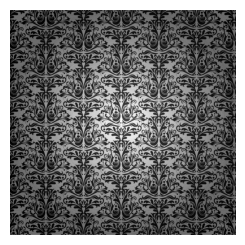

In [83]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.show()

## <span style='color:orange;'>Method II of The Power-Law (Gamma) Transformation</span>  

In [84]:
print(img_norm.shape)

(700, 700)


In [85]:
gam_img = np.zeros_like(img_norm)
row, col = gam_img.shape
print(row, col)

700 700


In [86]:
for i in range(row):
    for j in range(col):
        gam_img[i, j] = c * (img_norm[i, j] ** gamma)

gam_img = gam_img.astype(np.uint8)

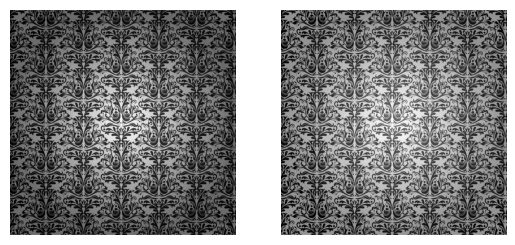

In [87]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(gam_img, cmap='gray')
plt.axis('off')

plt.show()

## <span style='color:orange;'>Method II of The Power-Law (Gamma) Transformation</span>  

In [88]:
print(img_norm.shape)

(700, 700)


In [89]:
gam_img = np.zeros_like(img_norm, dtype=np.float16)
row, col = gam_img.shape
print(row, col)

700 700


In [90]:
for i in range(row):
    for j in range(col):
        gam_img[i, j] = c * (img_norm[i, j] ** gamma)

gam_img = gam_img.astype(np.uint8)

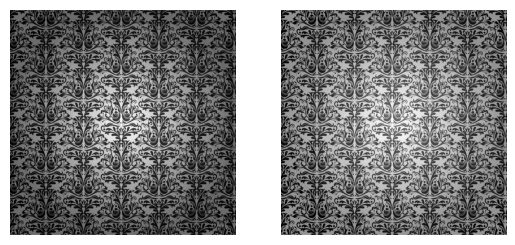

In [92]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(gam_img, cmap='gray')
plt.axis('off')

plt.show()

## <span style='color:lightblue;'>Method III of The Power-Law (Gamma) Transformation</span>  

In [93]:
k = np.amax(img)
print(k)

50


In [94]:
table = np.array([i/255.0 for i in range(256)])
gam_table = c * (table ** gamma)
gam_table = gam_table.astype(np.uint8)
print(gam_table)


[  0  15  22  27  31  35  39  42  45  47  50  52  55  57  59  61  63  65
  67  69  71  73  74  76  78  79  81  82  84  85  87  88  90  91  93  94
  95  97  98  99 100 102 103 104 105 107 108 109 110 111 112 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 141 142 143 144 145 146 147 148 148 149 150
 151 152 153 153 154 155 156 157 158 158 159 160 161 162 162 163 164 165
 165 166 167 168 168 169 170 171 171 172 173 174 174 175 176 177 177 178
 179 179 180 181 182 182 183 184 184 185 186 186 187 188 188 189 190 190
 191 192 192 193 194 194 195 196 196 197 198 198 199 200 200 201 201 202
 203 203 204 205 205 206 206 207 208 208 209 210 210 211 211 212 213 213
 214 214 215 216 216 217 217 218 218 219 220 220 221 221 222 222 223 224
 224 225 225 226 226 227 228 228 229 229 230 230 231 231 232 233 233 234
 234 235 235 236 236 237 237 238 238 239 240 240 241 241 242 242 243 243
 244 244 245 245 246 246 247 247 248 248 249 249 25

In [95]:
gam_img2 = cv2.LUT(img, gam_table)

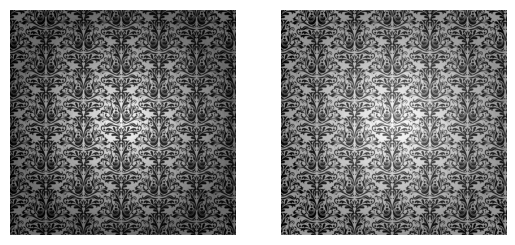

In [96]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(gam_img2, cmap='gray')
plt.axis('off')

plt.show()